In [1]:
import numpy as np
import pandas as pd

# for basic analysis
import scipy

# data Visualization tools
import matplotlib as mlt
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('melb_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [3]:
df.sample(10)

Suburb              Address  Rooms Type      Price Method  \
10396      Melton West          3 Becker Cl      3    h   410000.0      S   
10955       Canterbury     11 Parlington St      4    h  3250000.0     VB   
12393         Richmond          168 Mary St      4    h  2368000.0      S   
5799          St Kilda  25/69 Wellington St      2    u   542500.0     PI   
11018          Fawkner          50 Major Rd      1    h   515000.0      S   
1438    Brunswick West        1 Culloden St      3    h   995000.0      S   
10973      Craigieburn    16 Bottlebrush Rd      4    h   565000.0      S   
1832   Caulfield South         9 Filbert St      3    h  1470000.0      S   
8152           Niddrie       59 Hoffmans Rd      3    h   944000.0      S   
5685       South Yarra           9 Moore St      3    h  1125000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
10396       Reliance  27/05/2017      31.7    3337.0  ...       2.0  2.0   
10955         Jellis  12/08/2017       8.4    3126.0  ...       2.0  3.0   
12393         Jellis   3/09/2017       2.4    3121.0  ...       1.0  3.0   
5799         McGrath  10/09/2016       6.1    3182.0  ...       1.0  1.0   
11018  hockingstuart  12/08/2017      13.1    3060.0  ...       1.0  0.0   
1438            Brad  23/04/2016       5.9    3055.0  ...       1.0  2.0   
10973            Ray  12/08/2017      20.6    3064.0  ...       2.0  2.0   
1832            Gary   7/05/2016       9.3    3162.0  ...       2.0  2.0   
8152           Barry  13/05/2017      11.2    3042.0  ...       1.0  2.0   
5685         Thomson  24/09/2016       3.3    3141.0  ...       1.0  0.0   

       Landsize  BuildingArea  YearBuilt    CouncilArea Lattitude  Longtitude  \
10396     740.0         119.0     1985.0         Melton -37.68052   144.55106   
10955     855.0           NaN        NaN     Boroondara -37.82024   145.06172   
12393     390.0           NaN        NaN            NaN -37.82483   145.00111   
5799        0.0           NaN        NaN   Port Phillip -37.85680   144.98730   
11018     173.0           NaN        NaN       Moreland -37.70745   144.97046   
1438      505.0           NaN        NaN       Moreland -37.75700   144.94460   
10973     482.0         207.0     2012.0           Hume -37.57416   144.91269   
1832      296.0           NaN     1910.0      Glen Eira -37.89060   145.02240   
8152      597.0           NaN        NaN  Moonee Valley -37.74730   144.89050   
5685      146.0          89.0     1910.0    Stonnington -37.84540   144.98880   

                  Regionname Propertycount  
10396      Northern Victoria        6065.0  
10955  Southern Metropolitan        3265.0  
12393  Northern Metropolitan       14949.0  
5799   Southern Metropolitan       13240.0  
11018  Northern Metropolitan        5070.0  
1438   Northern Metropolitan        7082.0  
10973  Northern Metropolitan       15510.0  
1832   Southern Metropolitan        5051.0  
8152    Western Metropolitan        2291.0  
5685   Southern Metropolitan       14887.0  

[10 rows x 21 columns]

In [4]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

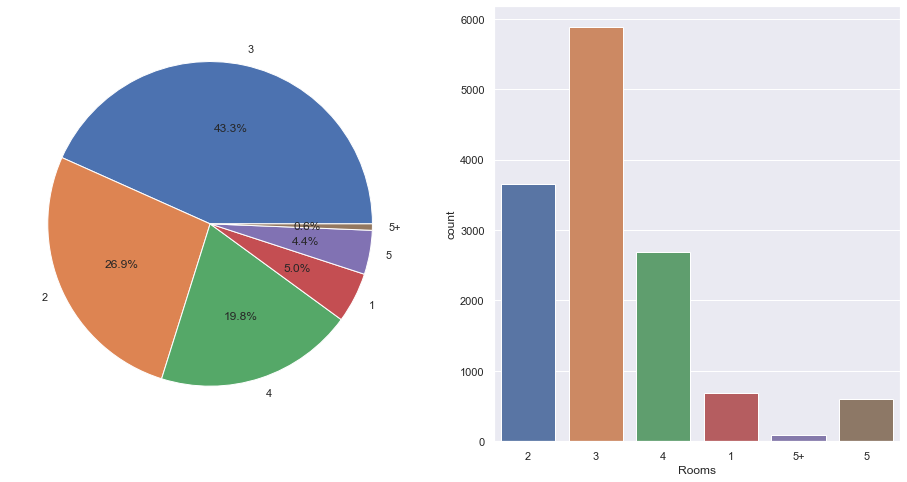

In [5]:
# Let us categorize with respect to number of rooms
fig_num_rooms, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

by_room_number = df['Rooms'].copy()

## All the houses with rooms more than 5 will me categorized into 5+
by_room_number[by_room_number>5] = '5+'
rooms_count = by_room_number.value_counts()

## Data prep for countplot
data_count = df['Rooms'].copy()
data_count[data_count>5] = '5+'

df_count = pd.DataFrame(data_count.value_counts())
df_count.index.names=['count']
ax1.pie(x=df_count['Rooms'].values,labels=df_count.index.values,autopct='%1.1f%%',)
sns.countplot(x=data_count,ax=ax2)
plt.show()

# Inference From the above Figure
<p>Rooms with <b style="color:red">3</b> bhk are having the top share of 43.3% in Melbourne</p>

<ipython-input-6-016fa4d0e8f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_room_change['Rooms'][df_room_change['Rooms'] > 5] = "5+"


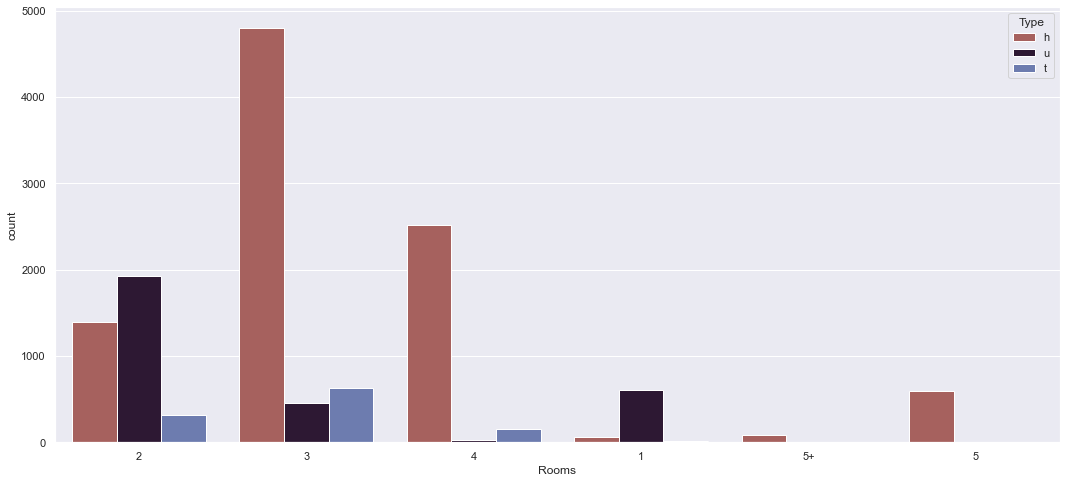

In [6]:
## Let us categorize the number of rooms with respect ot types
df_room_change = df.copy()
df_room_change['Rooms'][df_room_change['Rooms'] > 5] = "5+"
plt.figure(figsize=(18,8))
sns.countplot(data=df_room_change,x='Rooms',hue='Type',palette='twilight_r')
plt.show()

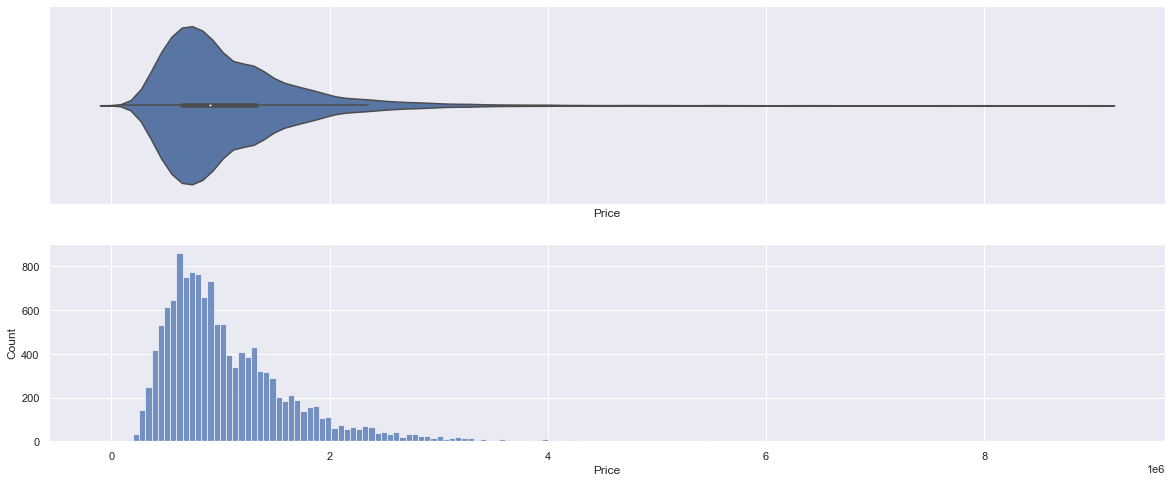

In [7]:
# Overall Price Distribution
fig_price,(ax1,ax2) = plt.subplots(2,1,figsize=(20,8),sharex=True)
sns.violinplot(x='Price',data=df,ax=ax1)
sns.histplot(x='Price',data=df,ax=ax2)
plt.show()

## Let us look at the Price Distribution accross Regions

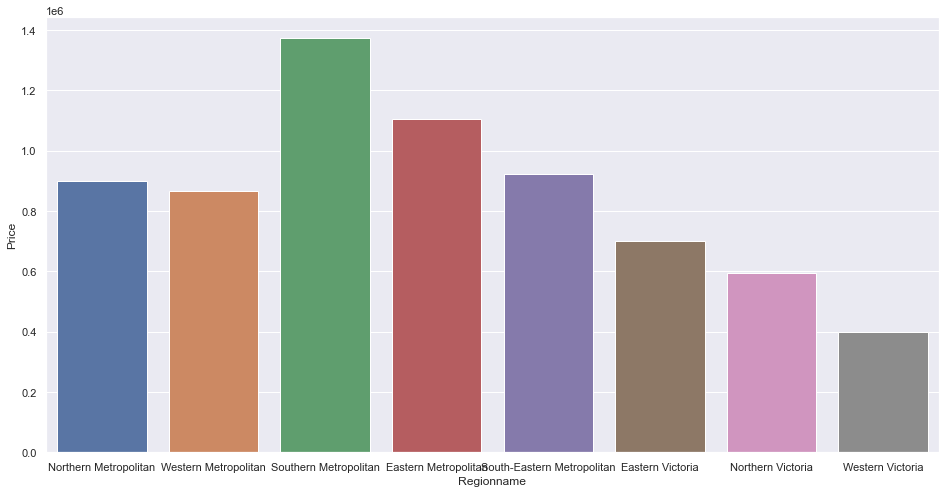

In [8]:
df_regional_price = df_room_change.loc[:,['Regionname','Price','Rooms']].copy()
plt.figure(figsize=(16,8))
sns.barplot(data=df_regional_price,x='Regionname',y='Price',ci=None)
plt.show()

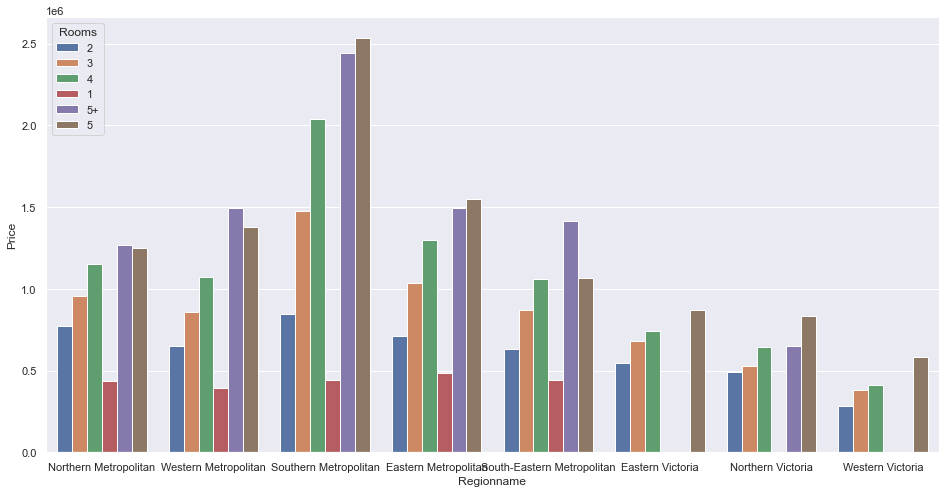

In [9]:
plt.figure(figsize=(16,8))
sns.barplot(data=df_regional_price,x='Regionname',y='Price',hue='Rooms',ci=None)
plt.show()

## Let us look at the Retail sellers in Melbourne 

In [10]:
df_room_change['SellerG'].nunique()

268

<h4>There are total '<b><i>268</i></b>' Sellers in this dataset</h4>
      <p>Let us select the top 10 Sellers in this dataset and the rest will be tagged as others</p>

In [11]:
top_10_sellers = df_room_change['SellerG'].value_counts().index.values[:10]
pd.DataFrame(df_room_change['SellerG'].value_counts()[:10])

SellerG
Nelson            1565
Jellis            1316
hockingstuart     1167
Barry             1011
Ray                701
Marshall           659
Buxton             632
Biggin             393
Brad               342
Fletchers          301

In [12]:
## Top 10 sellers in Melbourne
def check_seller(name):
    if name not in top_10_sellers:
        return False
    else:
        return True
df_sellers_data = df_room_change.copy()

In [13]:
df_sellers_data['SellerG'][~df_sellers_data['SellerG'].apply(check_seller)] = "Other"

<ipython-input-13-d61de001c2f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sellers_data['SellerG'][~df_sellers_data['SellerG'].apply(check_seller)] = "Other"


In [14]:
 df_top_10_sellers = df_sellers_data[df_sellers_data['SellerG']!="Other"]

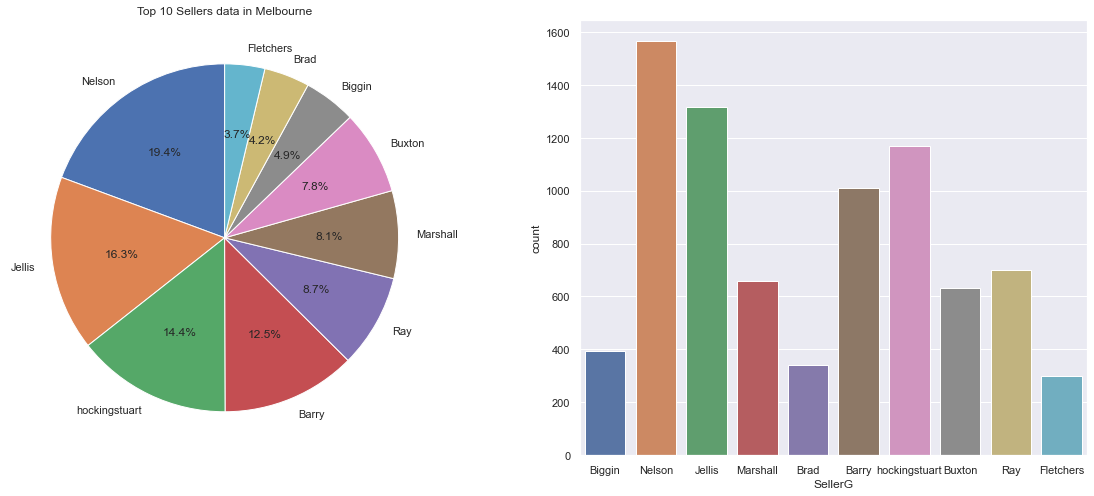

In [15]:
## Plot for the top 10 sellers in melbourne
fig_seller , (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
seller_labels = df_top_10_sellers['SellerG'].value_counts().index.values
ax1.pie(x=df_top_10_sellers['SellerG'].value_counts(),labels=seller_labels,autopct="%1.1f%%",startangle=90)
ax1.set_title("Top 10 Sellers data in Melbourne")
sns.countplot(data=df_top_10_sellers,x='SellerG',ax=ax2)
plt.show()

### We can also find out the Sellers with respect to the Regions they work in

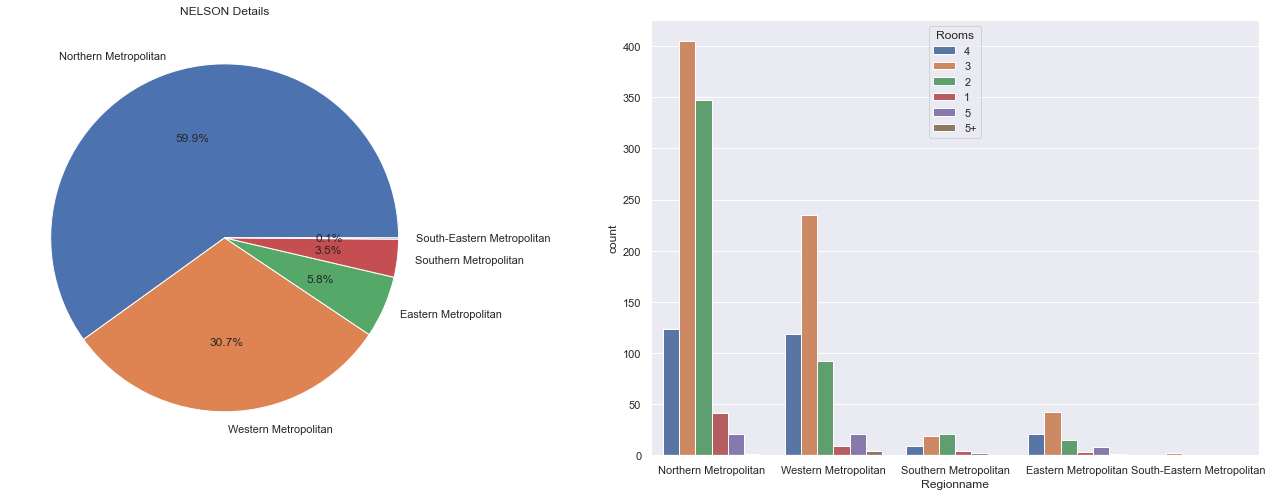

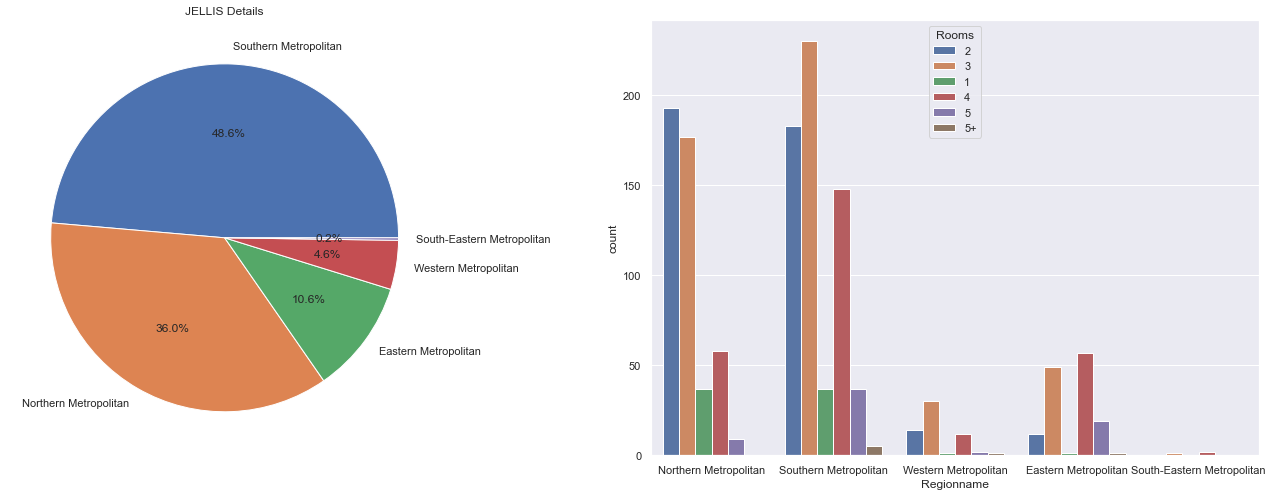

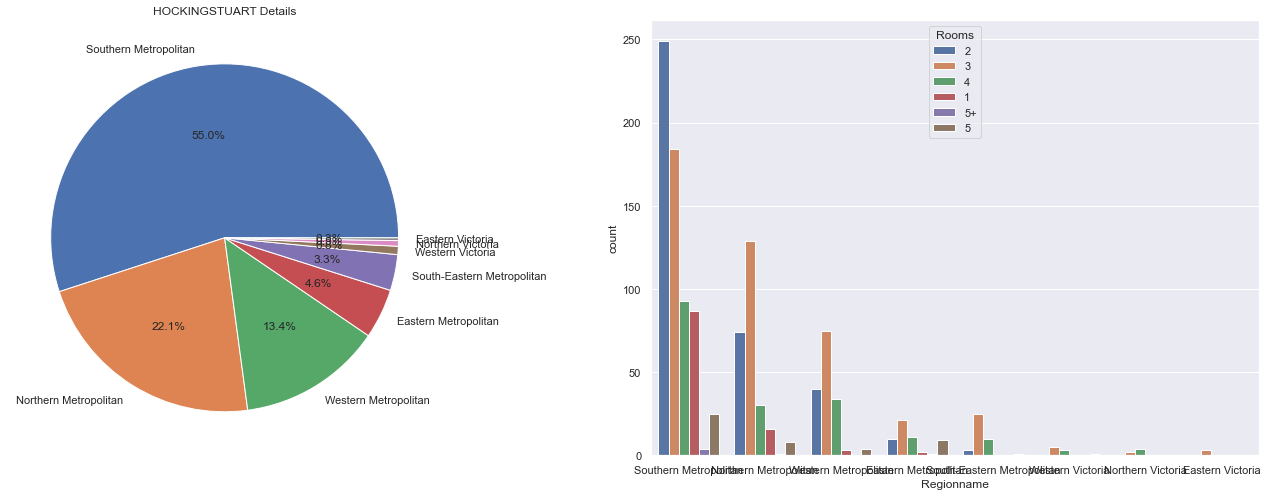

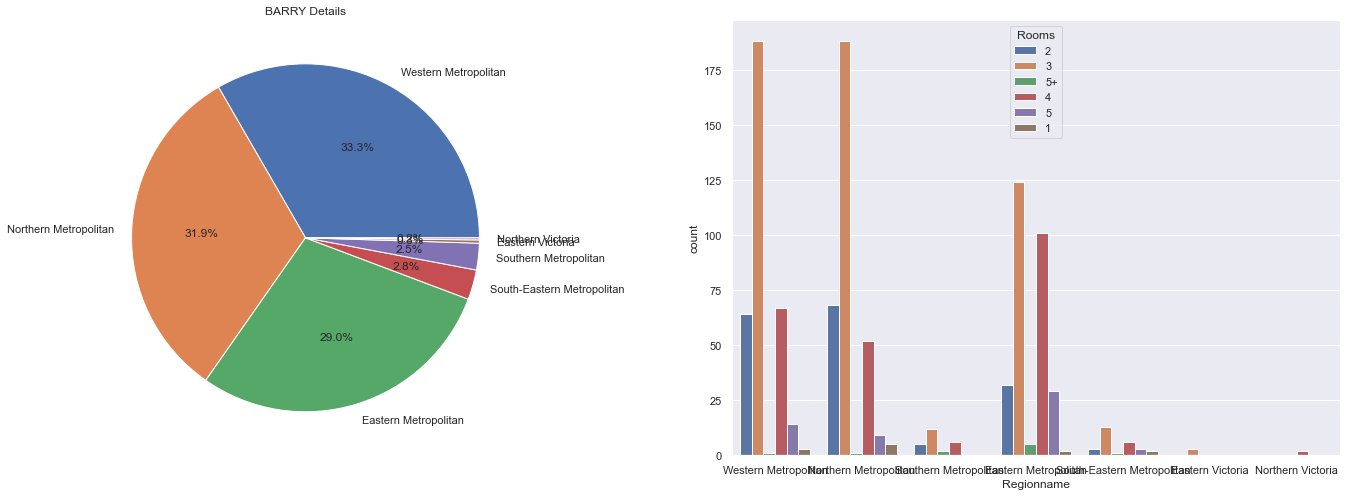

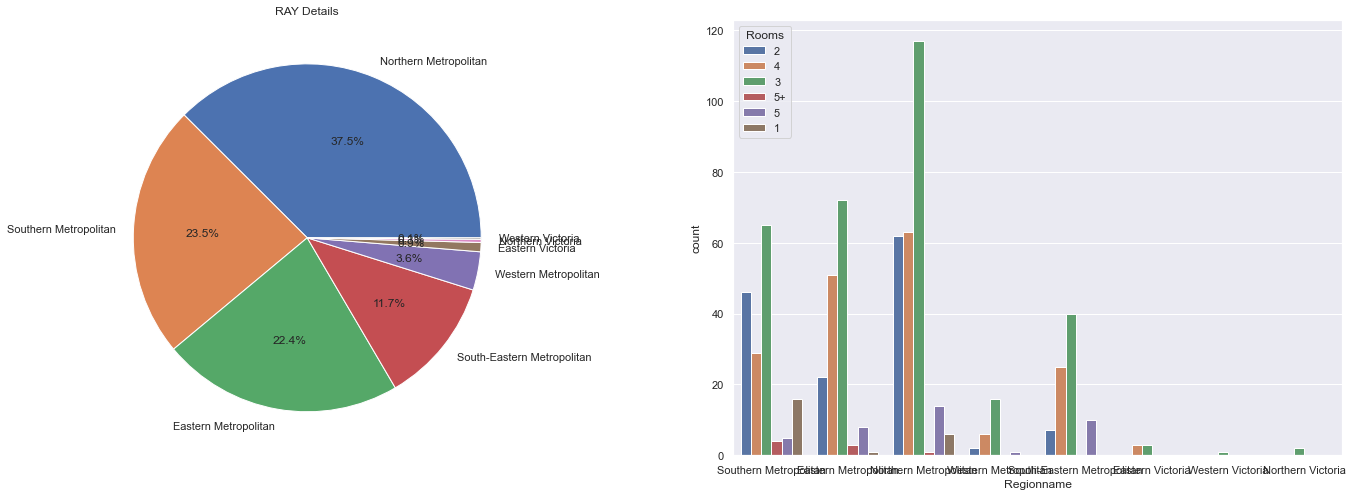

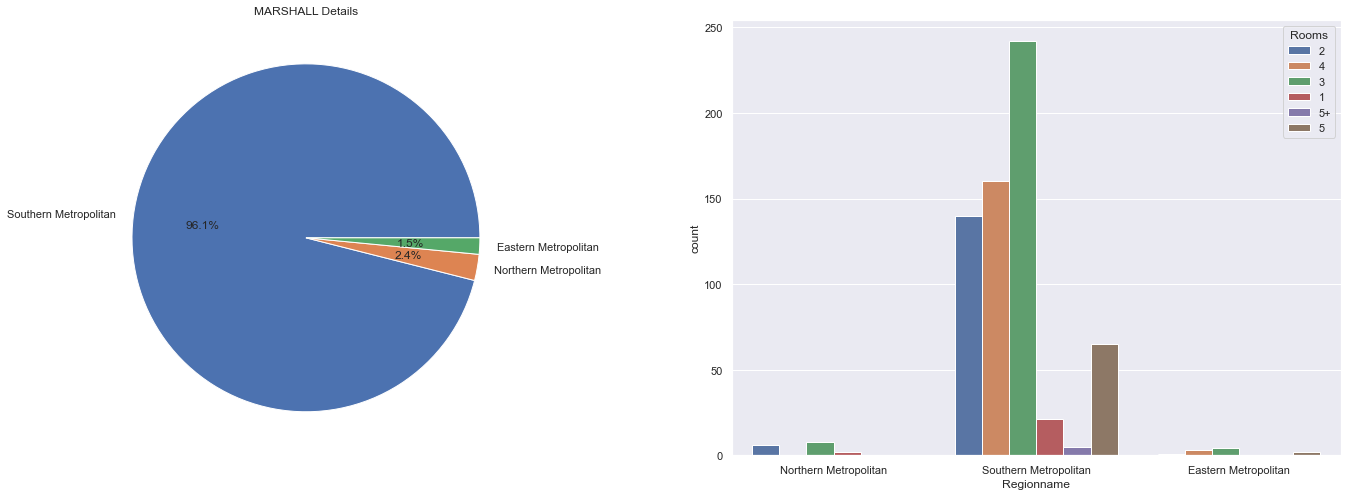

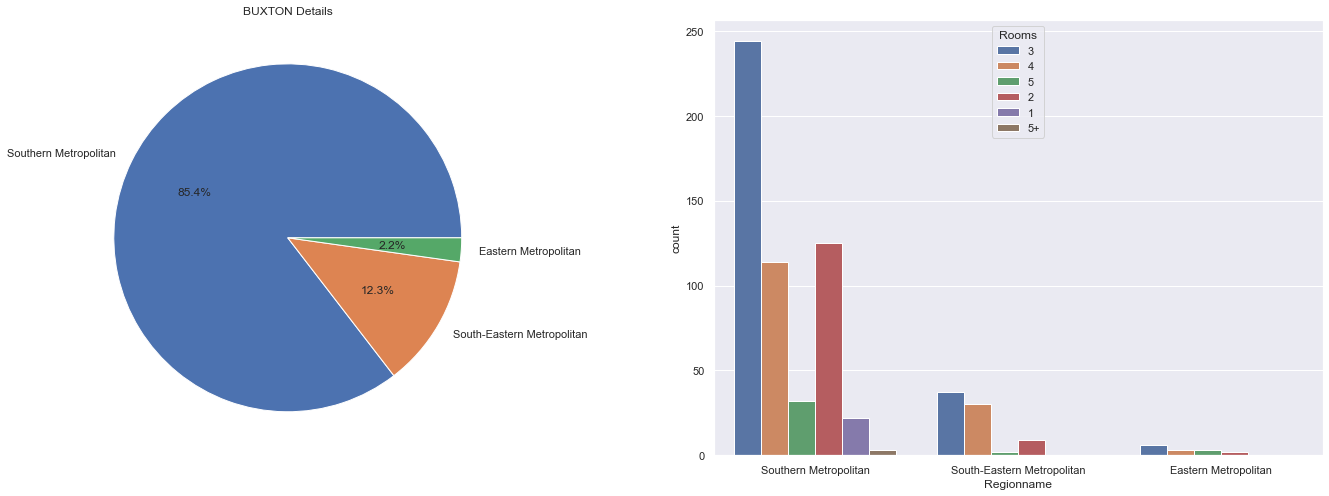

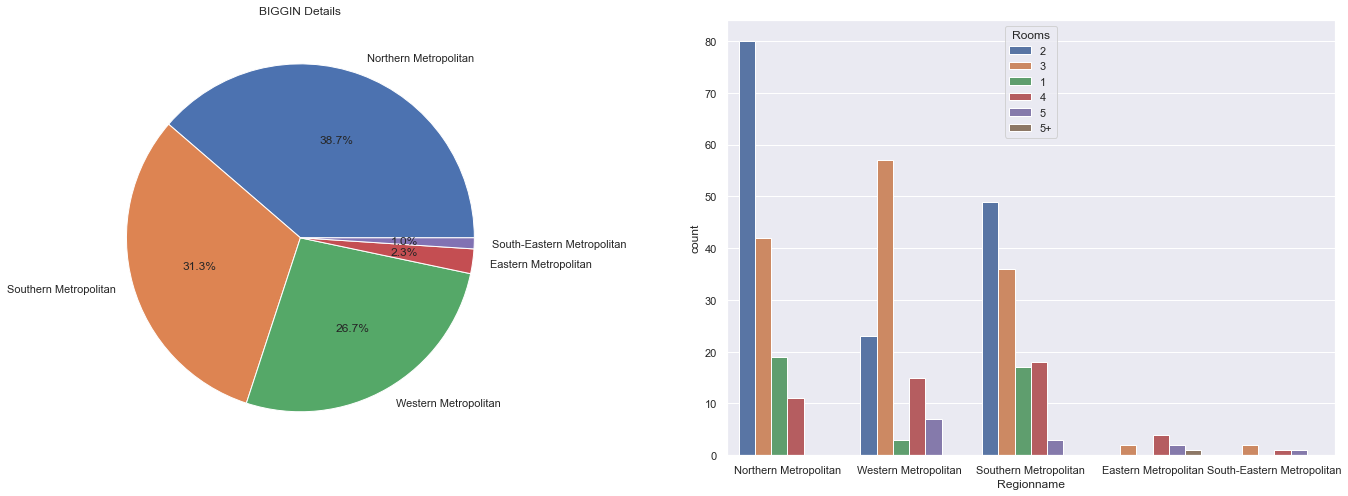

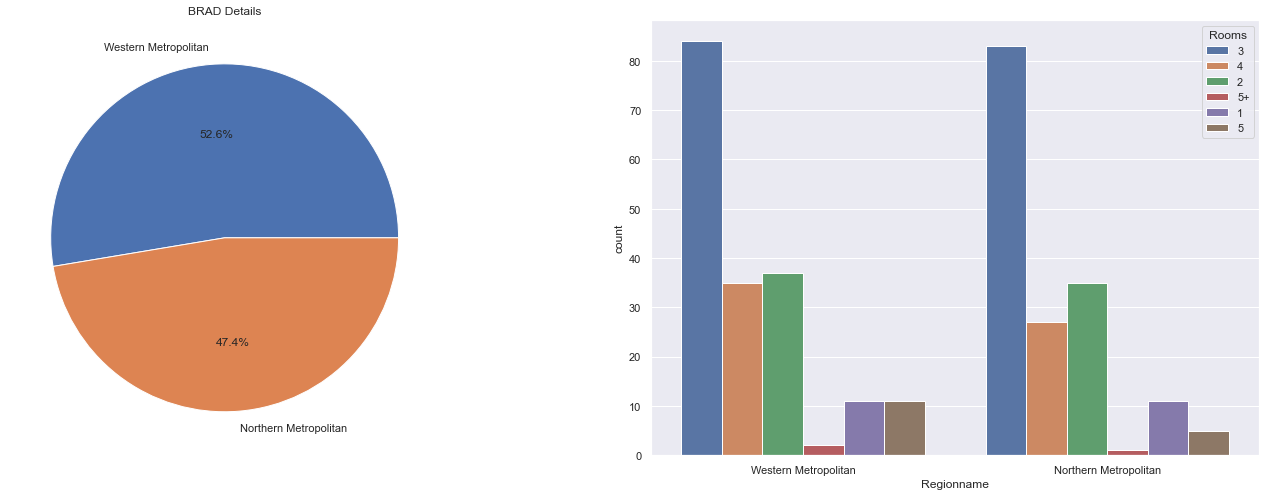

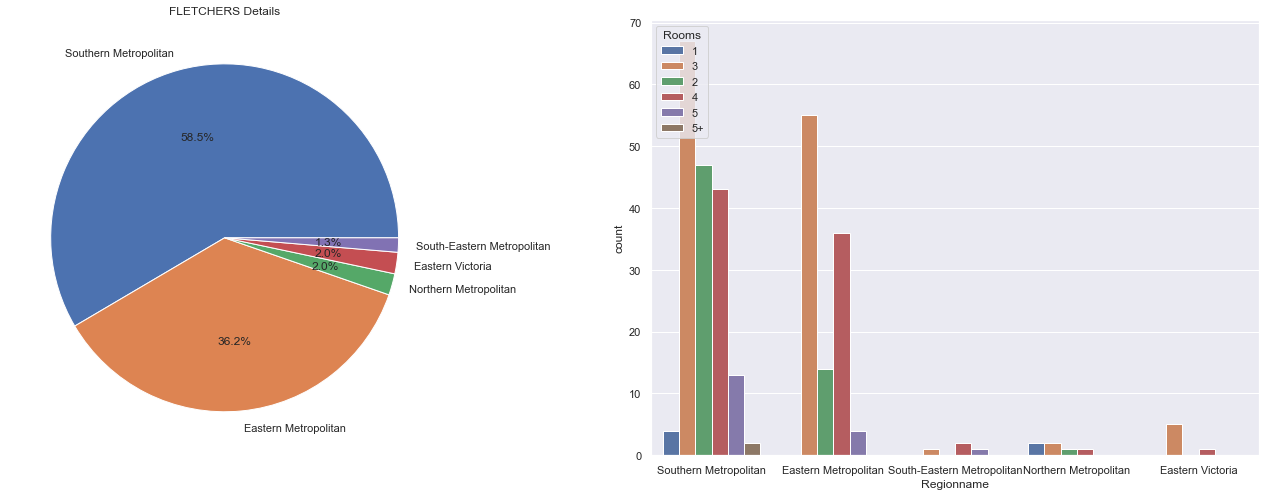

In [16]:
for seller in top_10_sellers:
    dummy_data = df_top_10_sellers[df_top_10_sellers['SellerG'] == seller]
    fig_seller, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
    region_labels = dummy_data['Regionname'].value_counts().index.values
    ax1.pie(x=dummy_data['Regionname'].value_counts().values,labels=region_labels,autopct="%1.1f%%")
    ax1.set_title(f"{seller.upper()} Details")
    sns.countplot(data=dummy_data,x="Regionname",hue='Rooms')
    plt.show()

## Let us look at the price and Rooms distribution on a regional Basis

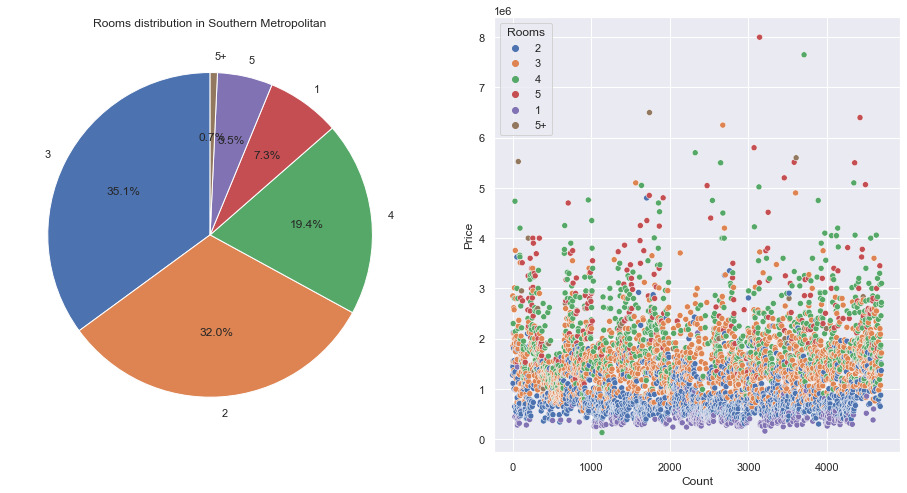

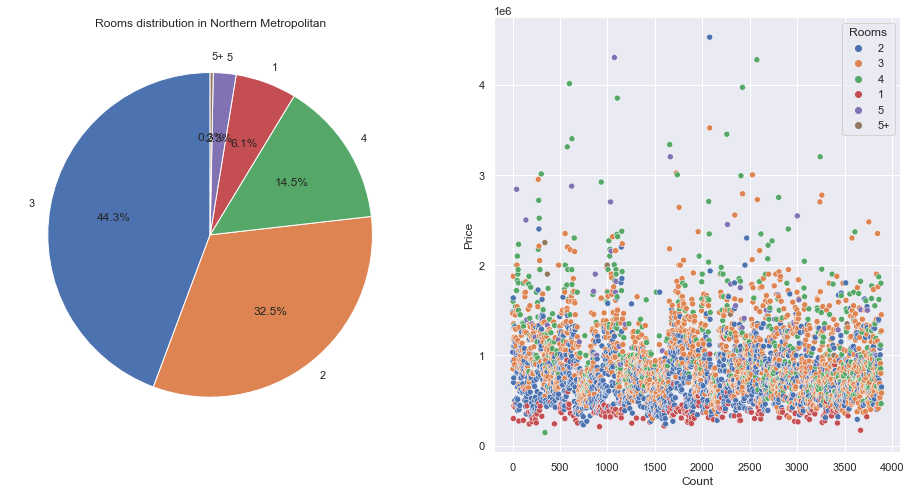

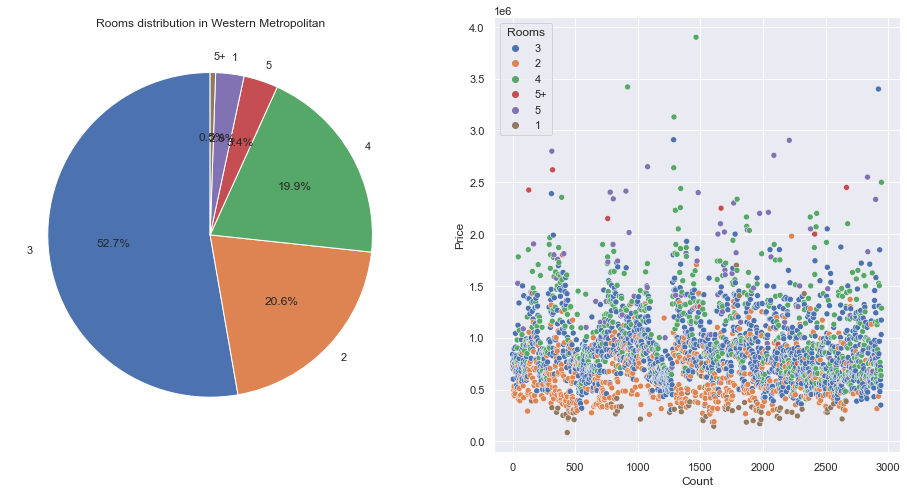

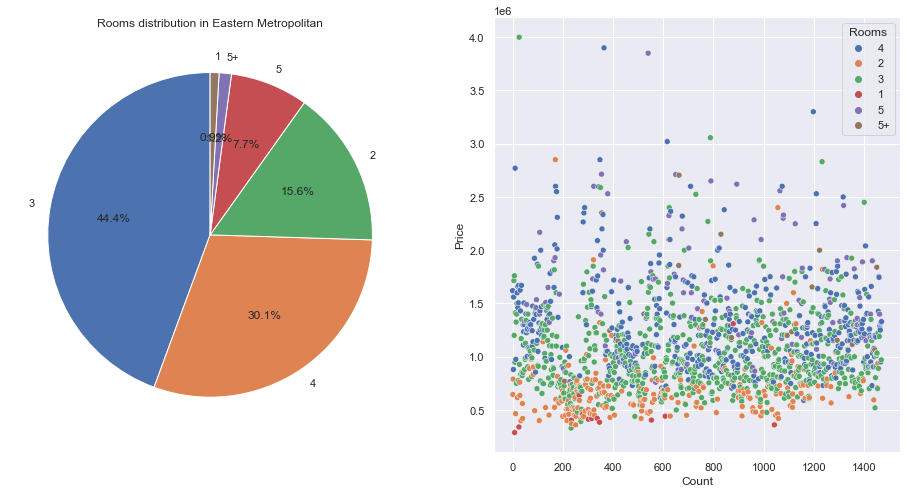

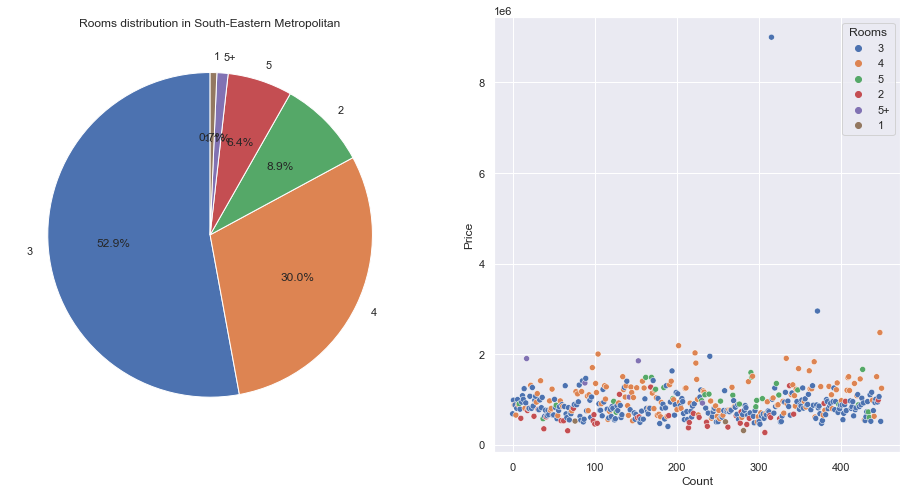

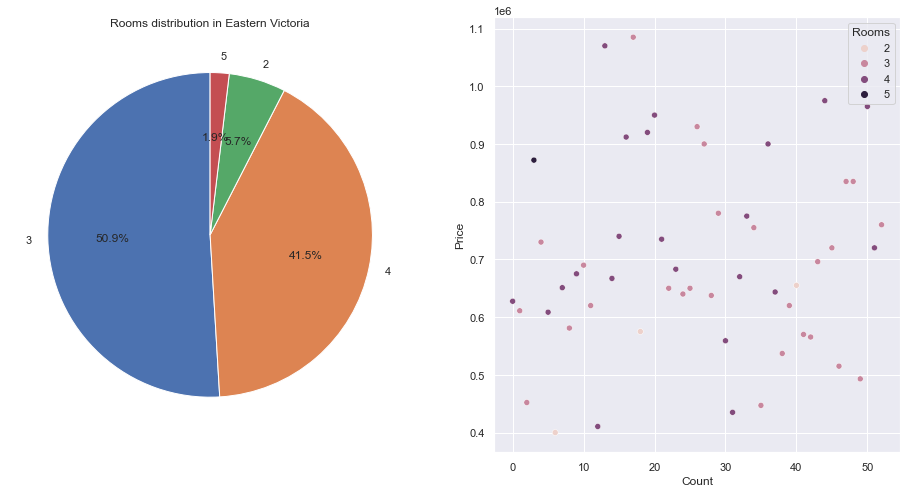

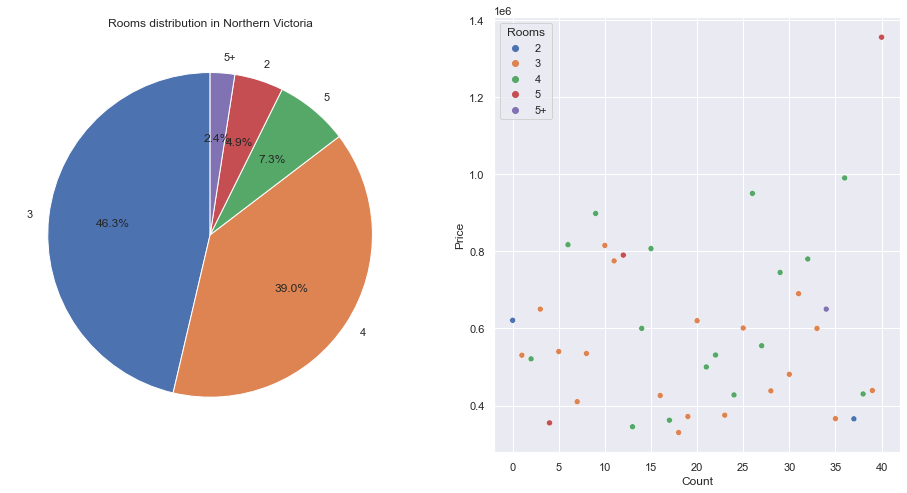

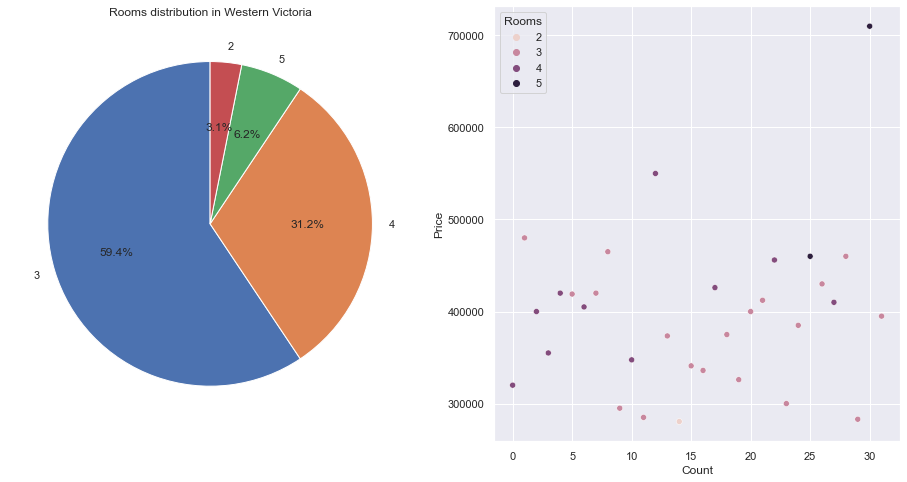

In [17]:
region_names = df_room_change['Regionname'].value_counts().index.values
for region in region_names:
    region_df = df_room_change[df_room_change["Regionname"]==region].copy()
    region_df['count_index'] = range(len(region_df))
    fig_regional_dist, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
    rooms_for_region_label = region_df['Rooms'].value_counts().index.values
    rooms_for_region_values = region_df['Rooms'].value_counts().values
    ax1.pie(x=rooms_for_region_values,labels=rooms_for_region_label,autopct="%1.1f%%",startangle=90)
    ax1.set_title(f"Rooms distribution in {region}")
    sns.scatterplot(data=region_df,x='count_index',y='Price',hue='Rooms')
    ax2.set_xlabel('Count')
    plt.show()

## Let us see correlation  between all the columns

<AxesSubplot:>

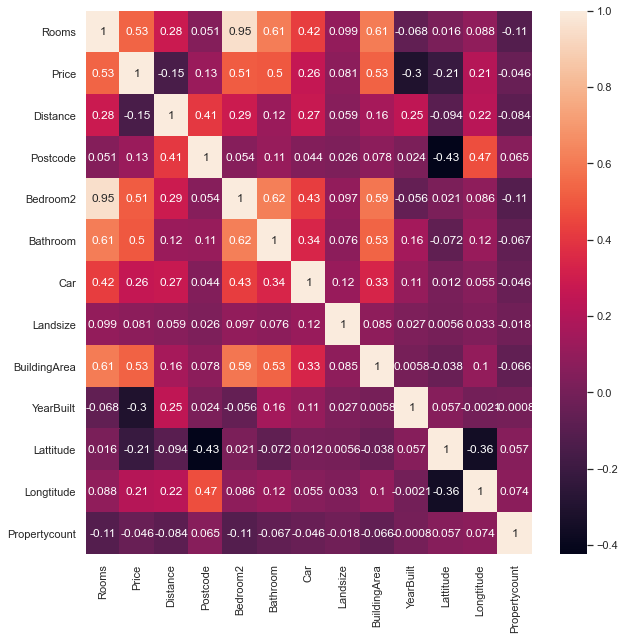

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.dropna().corr(),annot=True)

## If Price was the main Criteria then according to the Heatmap Price is best influenced by 
<ol type='1'>
        <li>Rooms</li>
        <li>Building Area</li>
        <li>Beedroom2</li>
      </ol>

In [19]:
df_date_data = df_room_change.copy()

In [20]:
sr=pd.to_datetime(df_date_data['Date'])
df_date_data['Month'] = sr.dt.month_name(locale = 'English')
df_date_data['Year'] = pd.DatetimeIndex(df_date_data['Date']).year

In [21]:
df_date_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  object 
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

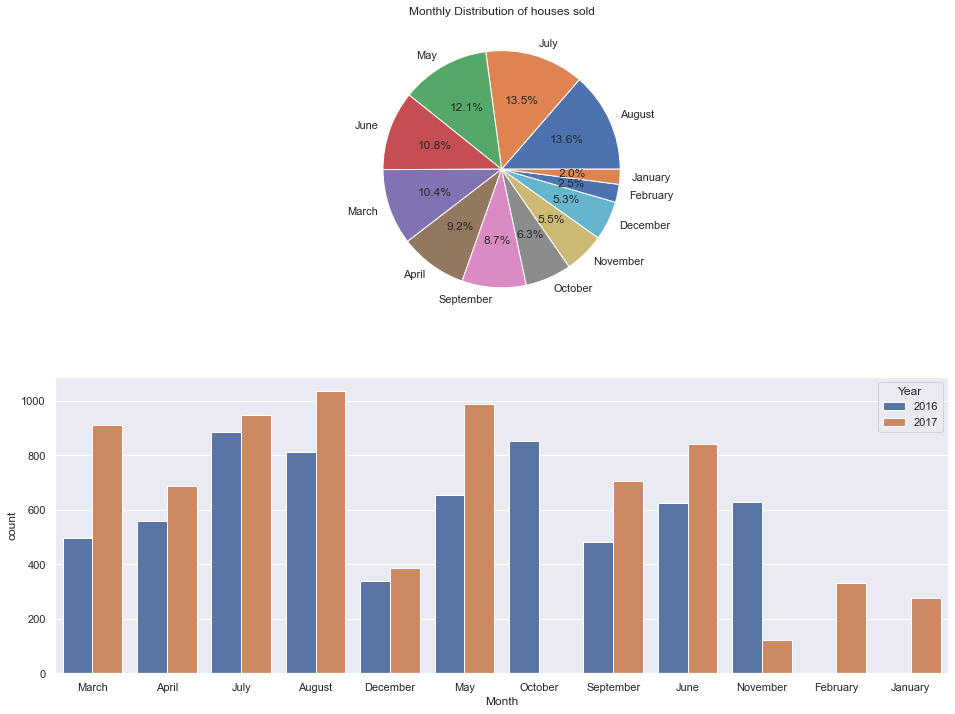

In [22]:
fig_month,(a1,a2) = plt.subplots(2,1,figsize=(16,12)) 
sns.countplot(data=df_date_data,x='Month',hue='Year',ax=a2)
month_labels = df_date_data['Month'].value_counts().index.values
sold_counts = df_date_data['Month'].value_counts().values
a1.pie(x=sold_counts,labels=month_labels,autopct="%1.1f%%")
a1.set_title("Monthly Distribution of houses sold")
plt.show()

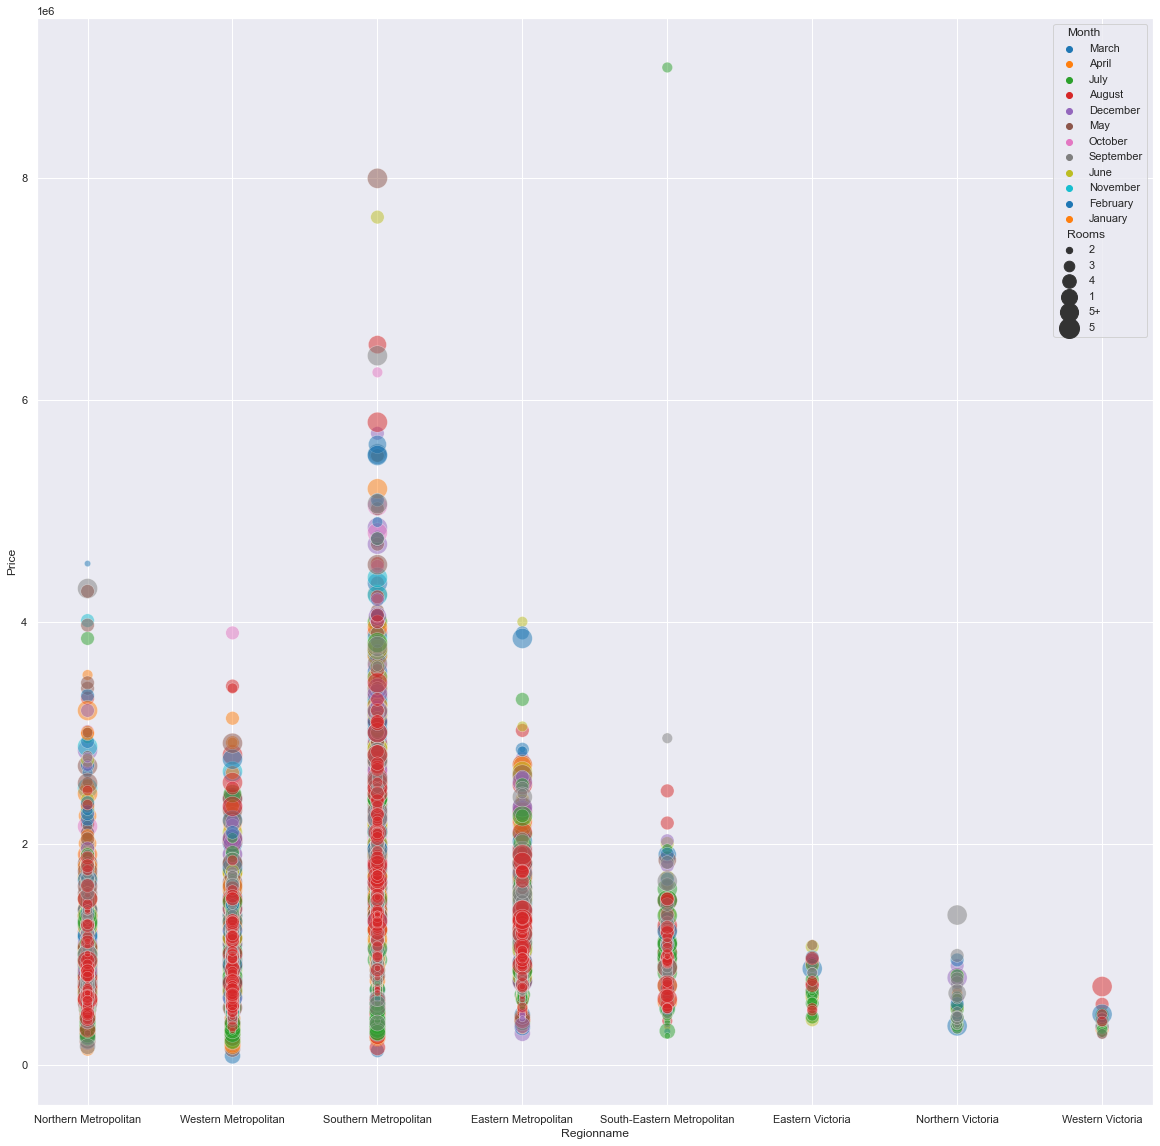

In [23]:
## Classification with respect to monthly prices with respect to region and room size
plt.figure(figsize=(20,20))
sns.scatterplot(data=df_date_data,x='Regionname',y='Price',hue="Month",size="Rooms", sizes=(400, 40),alpha=0.5,palette='tab10')
plt.show()

In [24]:
df_room_change['Longtitude'] = abs(df_room_change['Longtitude'])

# Regionwise Plot for Houses in Melbourne

In [25]:
#plt.figure(figsize=(16,10))
#sns.scatterplot(data=df_room_change,x='Longtitude',y='Lattitude',hue="Regionname",size="Rooms",sizes=(200,20),alpha=0.5)

## top 10 sellerwise distribution plot

In [26]:
#df_top_10_sellers['Longtitude'] = abs(df_top_10_sellers['Longtitude'].copy())

In [27]:
#plt.figure(figsize=(16,10))
#sns.scatterplot(data=df_top_10_sellers,x='Longtitude',y='Lattitude',hue="SellerG")

In [28]:
# import plotly.express as px
# geo_location = df[['Lattitude', 'Longtitude', 'Regionname', 'SellerG','Price']].copy()

# px.scatter(geo_location, y='Longtitude', x='Lattitude', color='Regionname', 
#            hover_data=['Regionname', 'SellerG','Price'], 
#            title='Distribution of real estate by districts of Melbourne',
#            color_discrete_sequence=px.colors.sequential.Oryel)

In [29]:
# seller_loc = df_top_10_sellers[['Lattitude', 'Longtitude', 'Regionname', 'SellerG','Price']].copy()

# px.scatter(seller_loc, y='Lattitude', x='Longtitude', color='SellerG', 
#            hover_data=['Regionname', 'Regionname','Price'], 
#            title='Distribution of real estate by districts of Melbourne',
#            color_discrete_sequence=px.colors.sequential.Aggrnyl)

In [30]:
#df = px.data.gapminder().query("year == 2007")



%load_ext autoreload
%autoreload 2



seller_loc = df_top_10_sellers[['Lattitude', 'Longtitude', 'Regionname', 'SellerG','Price','Rooms']].copy()
fig = px.scatter_mapbox(seller_loc, lat="Lattitude", lon="Longtitude", hover_name="Regionname",hover_data=['Regionname',"Price",'Rooms'],
                        color="SellerG", zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()